In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("/kaggle/input/airbnb-netherlands-belgium/AirBNB_Holland_Belgium.xlsx")
df.head()

,id,name,host_id,country,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,1,Oostelijk Havengebied - Indische Buurt,5236575,494142,Private room,59,3,278,200.0,1,125
1,20168,Studio with private bathroom in the centre 1,59484,1,Centrum-Oost,5236509,489354,Private room,209,1,340,267.0,3,3
2,25428,Lovely apt in City Centre (w.lift) near Jordaan,56142,1,Centrum-West,5237297,488339,Entire home/apt,125,14,5,16.0,1,188
3,27886,"Romantic, stylish B&B houseboat in canal district",97647,1,Centrum-West,5238761,489188,Private room,135,2,219,209.0,1,183
4,28871,Comfortable double room,124245,1,Centrum-West,5236719,489092,Private room,75,2,334,274.0,2,348


In [3]:
df.shape

(21371, 14)

In [4]:
df.isnull().sum()

id                                   0
name                                34
host_id                              0
country                              0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 2771
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [5]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
country                             int64
neighbourhood                      object
latitude                            int64
longitude                           int64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [6]:
df.nunique()

id                                21371
name                              20880
host_id                           17976
country                               2
neighbourhood                        78
latitude                           7774
longitude                         11644
room_type                             4
price                               550
minimum_nights                       68
number_of_reviews                   432
reviews_per_month                   713
calculated_host_listings_count       31
availability_365                    366
dtype: int64

In [7]:
df2 = df.copy()
df.drop(['id','host_id'],axis=1,inplace=True)
df.describe()

,country,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,21371.000000,2.137100e+04,2.137100e+04,21371.000000,21371.000000,21371.000000,18600.000000,21371.000000,21371.000000
mean,1.113331,2.450859e+11,2.288202e+11,154.572411,3.730148,25.312947,77.537473,2.681812,69.561789
std,0.317005,3.582798e+13,3.345075e+13,161.145977,18.288166,54.100036,129.731251,7.434028,117.092384
min,1.000000,5.240000e+02,4.400000e+01,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
25%,1.000000,5.234377e+06,4.846850e+05,90.000000,2.000000,2.000000,16.000000,1.000000,0.000000
50%,1.000000,5.236044e+06,4.875260e+05,125.000000,2.000000,8.000000,36.000000,1.000000,0.000000
75%,1.000000,5.237257e+06,4.902435e+05,180.000000,3.000000,24.000000,77.000000,1.000000,90.000000
max,2.000000,5.237629e+15,4.890106e+15,8000.000000,1125.000000,850.000000,4461.000000,85.000000,365.000000


Room Type vs ..

In [8]:
df['country_name'] = df['country'].map({1: 'Netherlands', 2: 'Belgium'})

In [9]:
df.head(3)

,name,country,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,country_name
0,Quiet Garden View Room & Super Fast WiFi,1,Oostelijk Havengebied - Indische Buurt,5236575,494142,Private room,59,3,278,200.0,1,125,Netherlands
1,Studio with private bathroom in the centre 1,1,Centrum-Oost,5236509,489354,Private room,209,1,340,267.0,3,3,Netherlands
2,Lovely apt in City Centre (w.lift) near Jordaan,1,Centrum-West,5237297,488339,Entire home/apt,125,14,5,16.0,1,188,Netherlands


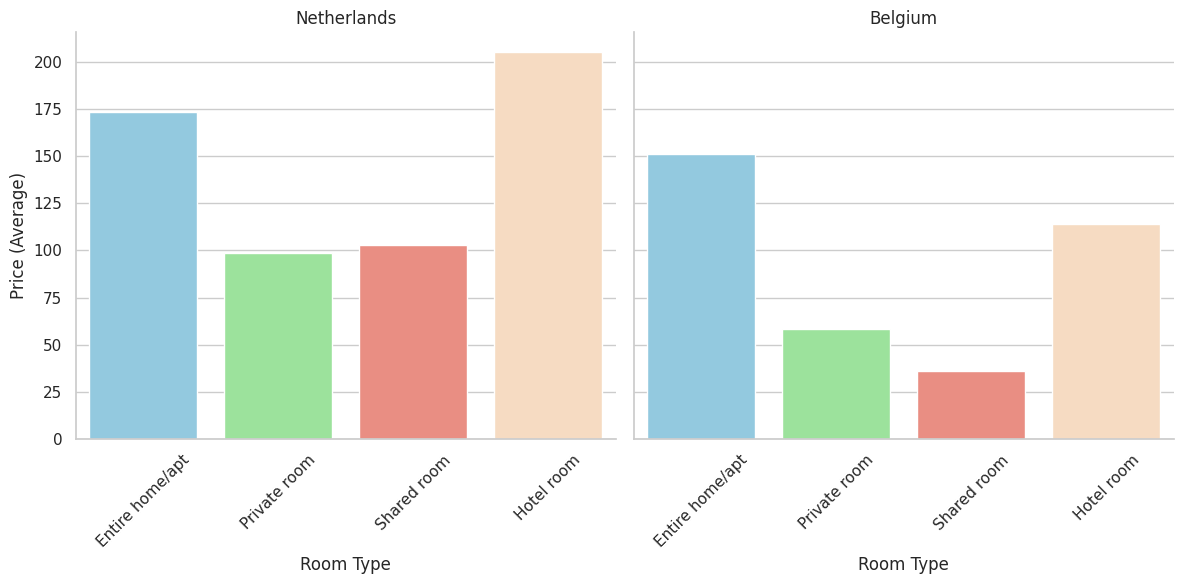

In [10]:
room_type_order = ['Entire home/apt', 'Private room', 'Shared room', 'Hotel room']

sns.set(style="whitegrid")
basic_colors = ['skyblue', 'lightgreen', 'salmon', 'peachpuff']


g = sns.FacetGrid(df, col='country_name', height=6, aspect=1)
g.map_dataframe(
    sns.barplot,
    x='room_type', y='price',
    estimator='mean',
    errorbar=None,
    order=room_type_order,
    palette=basic_colors
)

g.set_titles(col_template="{col_name}")
g.set_axis_labels("Room Type", "Price (Average)")
g.set_xticklabels(rotation=45)

g.tight_layout()

plt.show()

In [11]:
room_type_price_avg_ctr = df.groupby(['country_name', 'room_type'])['price'].mean().reset_index()
room_type_price_avg_ctr.columns = ['Country', 'Room Type', 'Price (Average)']

room_type_price_avg_ctr

,Country,Room Type,Price (Average)
0,Belgium,Entire home/apt,150.934211
1,Belgium,Hotel room,114.066667
2,Belgium,Private room,58.238182
3,Belgium,Shared room,36.363636
4,Netherlands,Entire home/apt,173.204598
5,Netherlands,Hotel room,205.195556
6,Netherlands,Private room,98.696885
7,Netherlands,Shared room,102.903226


In [12]:
room_type_price_avg_ctr[:4]

,Country,Room Type,Price (Average)
0,Belgium,Entire home/apt,150.934211
1,Belgium,Hotel room,114.066667
2,Belgium,Private room,58.238182
3,Belgium,Shared room,36.363636


In [13]:
room_type_price_avg_ctr[4:]

,Country,Room Type,Price (Average)
4,Netherlands,Entire home/apt,173.204598
5,Netherlands,Hotel room,205.195556
6,Netherlands,Private room,98.696885
7,Netherlands,Shared room,102.903226


Combined

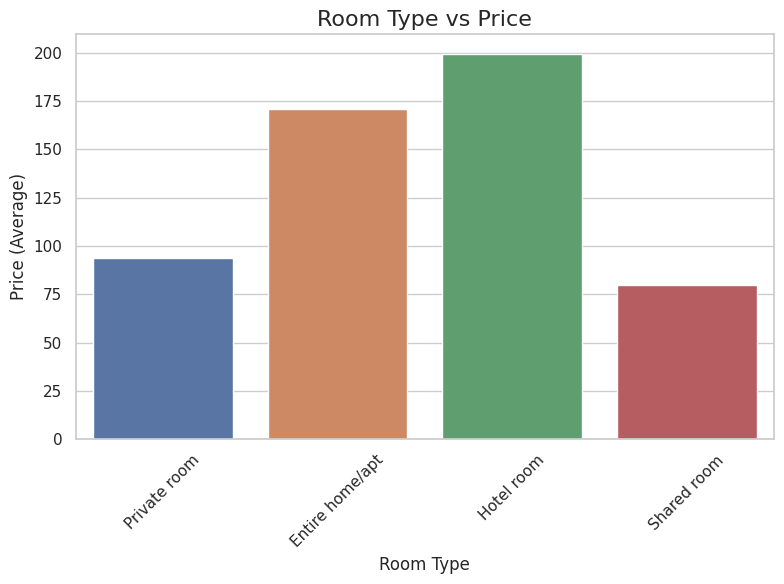

In [14]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.barplot(x='room_type', y='price', data=df, estimator='mean', errorbar=None)


plt.title('Room Type vs Price', fontsize=16)
plt.xlabel('Room Type', fontsize=12)
plt.ylabel('Price (Average)', fontsize=12)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [15]:
room_type_price_avg = df.groupby('room_type')['price'].mean().reset_index()
room_type_price_avg.columns = ['Room Type', 'Price (Average)']

room_type_price_avg

,Room Type,Price (Average)
0,Entire home/apt,170.753108
1,Hotel room,199.500000
2,Private room,93.714286
3,Shared room,79.789474


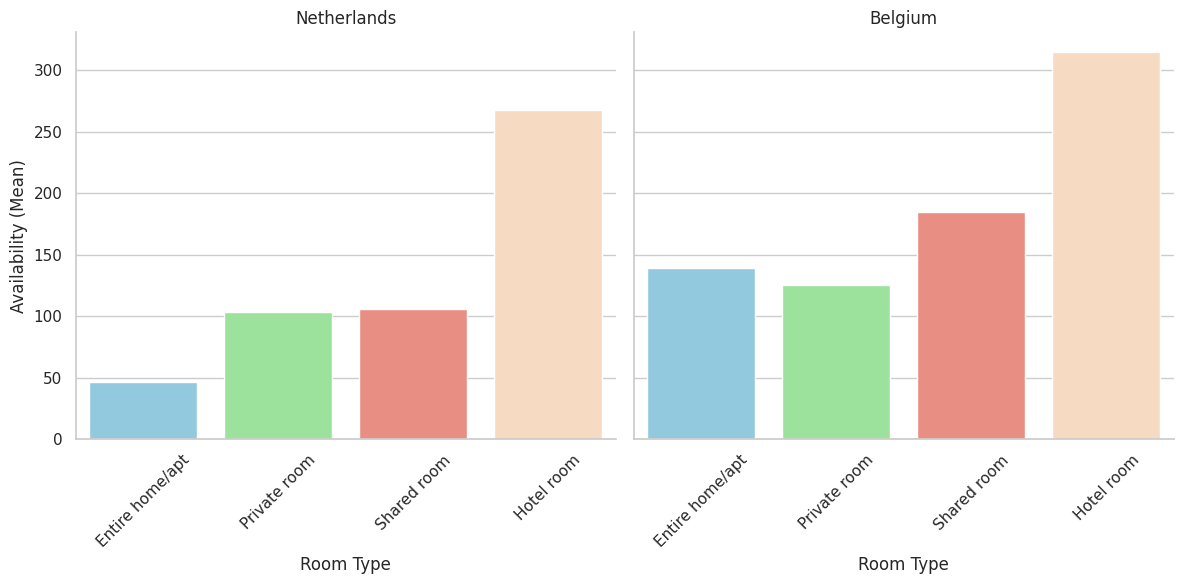

In [16]:
room_type_order = ['Entire home/apt', 'Private room', 'Shared room', 'Hotel room']

basic_colors = ['skyblue', 'lightgreen', 'salmon', 'peachpuff']

g = sns.FacetGrid(df, col='country_name', height=6, aspect=1)
g.map_dataframe(
    sns.barplot,
    x='room_type', y='availability_365',
    estimator='mean', errorbar=None,
    order=room_type_order,
    palette=basic_colors
)

g.set_titles(col_template="{col_name}")
g.set_axis_labels("Room Type", "Availability (Mean)")
g.set_xticklabels(rotation=45)

g.tight_layout()

plt.show()


In [17]:
room_type_av = df.groupby(['country_name','room_type'])['availability_365'].mean().reset_index()
room_type_av.columns = ['Country','Room Type', 'Availability (Average)']

room_type_av

,Country,Room Type,Availability (Average)
0,Belgium,Entire home/apt,139.016996
1,Belgium,Hotel room,315.000000
2,Belgium,Private room,125.723636
3,Belgium,Shared room,184.606061
4,Netherlands,Entire home/apt,46.269158
5,Netherlands,Hotel room,268.004444
6,Netherlands,Private room,103.148366
7,Netherlands,Shared room,105.774194


In [18]:
room_type_av[:4]

,Country,Room Type,Availability (Average)
0,Belgium,Entire home/apt,139.016996
1,Belgium,Hotel room,315.000000
2,Belgium,Private room,125.723636
3,Belgium,Shared room,184.606061


In [19]:
room_type_av[4:]

,Country,Room Type,Availability (Average)
4,Netherlands,Entire home/apt,46.269158
5,Netherlands,Hotel room,268.004444
6,Netherlands,Private room,103.148366
7,Netherlands,Shared room,105.774194


Combined

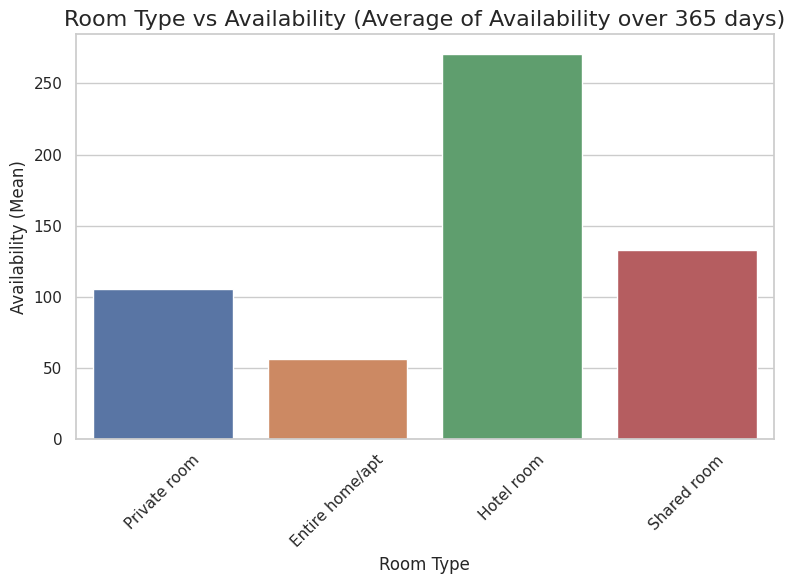

In [20]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.barplot(x='room_type', y='availability_365', data=df, estimator='mean', errorbar=None)
plt.title('Room Type vs Availability (Average of Availability over 365 days)', fontsize=16)
plt.xlabel('Room Type', fontsize=12)
plt.ylabel('Availability (Mean)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [21]:
room_type_av = df.groupby('room_type')['availability_365'].mean().reset_index()
room_type_av.columns = ['Room Type', 'Availability (Average)']

room_type_av

,Room Type,Availability (Average)
0,Entire home/apt,56.478696
1,Hotel room,270.941667
2,Private room,105.928571
3,Shared room,133.157895


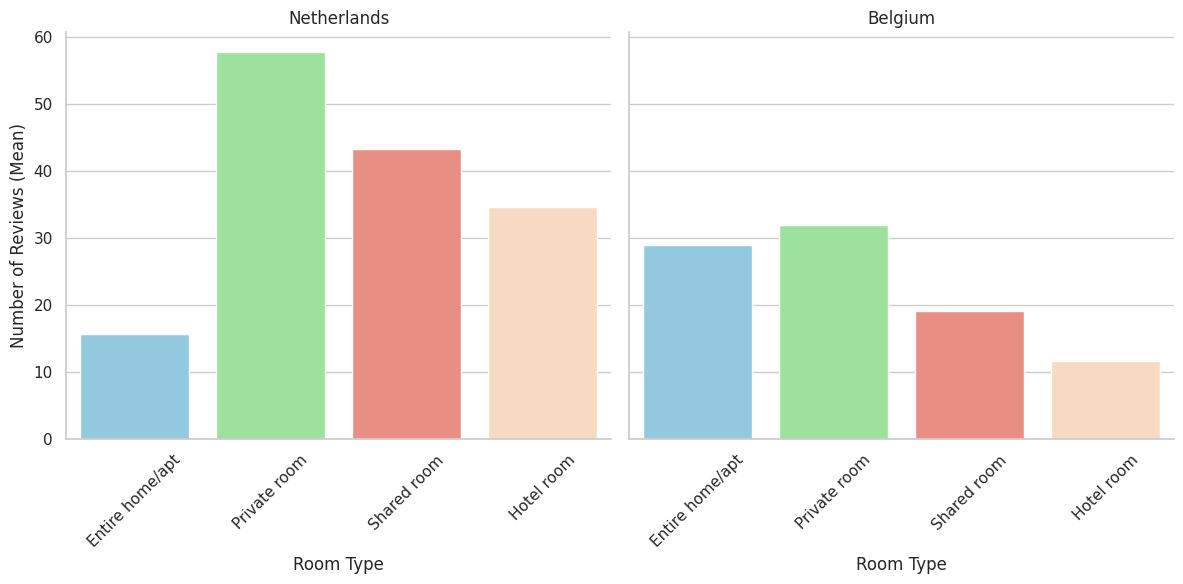

In [22]:
basic_colors = ['skyblue', 'lightgreen', 'salmon', 'peachpuff']

g = sns.FacetGrid(df, col='country_name', height=6, aspect=1)
g.map_dataframe(
    sns.barplot,
    x='room_type', y='number_of_reviews',
    estimator='mean', errorbar=None,
    order=room_type_order,
    palette=basic_colors
)

g.set_titles(col_template="{col_name}")
g.set_axis_labels("Room Type", "Number of Reviews (Mean)")
g.set_xticklabels(rotation=45)

g.tight_layout()

plt.show()


In [23]:
room_type_nr = df.groupby(['country_name','room_type'])['number_of_reviews'].mean().reset_index()
room_type_nr.columns = ['Country','Room Type', 'Number of Reviews (Average)']

room_type_nr

,Country,Room Type,Number of Reviews (Average)
0,Belgium,Entire home/apt,29.011513
1,Belgium,Hotel room,11.666667
2,Belgium,Private room,31.910909
3,Belgium,Shared room,19.090909
4,Netherlands,Entire home/apt,15.779737
5,Netherlands,Hotel room,34.711111
6,Netherlands,Private room,57.841164
7,Netherlands,Shared room,43.322581


Combined

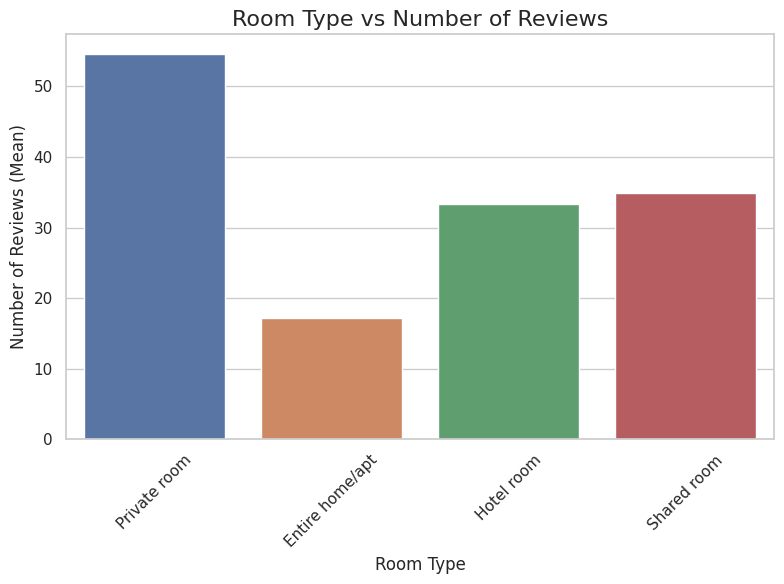

In [24]:
plt.figure(figsize=(8, 6))
sns.barplot(x='room_type', y='number_of_reviews', data=df, estimator='mean', errorbar=None)
plt.title('Room Type vs Number of Reviews', fontsize=16)
plt.xlabel('Room Type', fontsize=12)
plt.ylabel('Number of Reviews (Mean)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [25]:
room_type_nr = df.groupby('room_type')['number_of_reviews'].mean().reset_index()
room_type_nr.columns = ['Room Type', 'Number of Reviews (Average)']

room_type_nr

,Room Type,Number of Reviews (Average)
0,Entire home/apt,17.236270
1,Hotel room,33.270833
2,Private room,54.647783
3,Shared room,34.905263


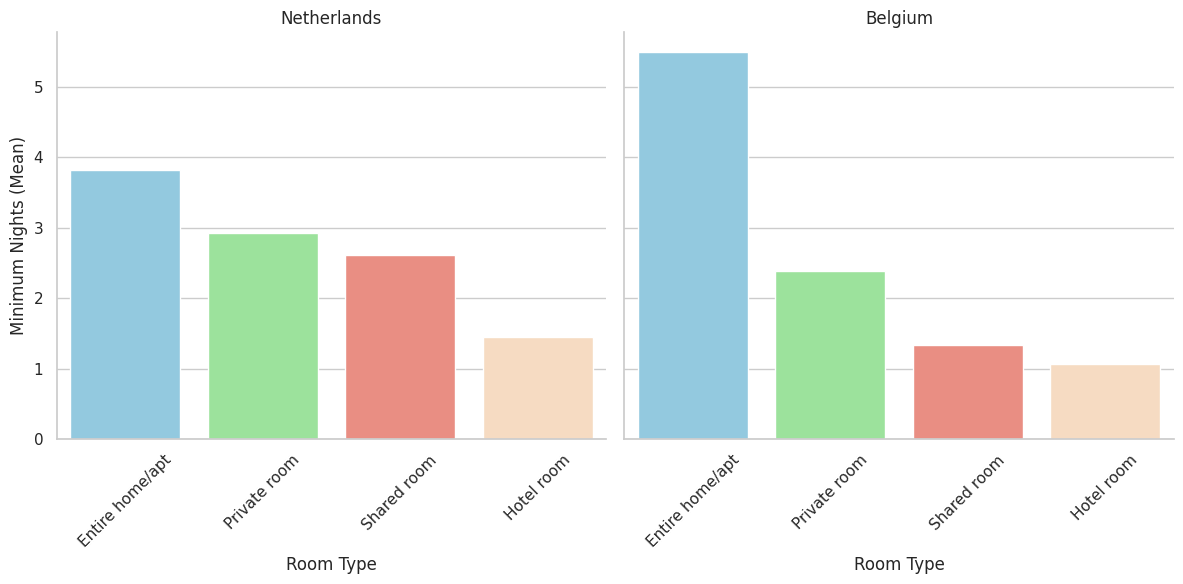

In [26]:
basic_colors = ['skyblue', 'lightgreen', 'salmon', 'peachpuff']

g = sns.FacetGrid(df, col='country_name', height=6, aspect=1)
g.map_dataframe(
    sns.barplot,
    x='room_type', y='minimum_nights',
    estimator='mean', errorbar=None,
    order=room_type_order,
    palette=basic_colors
)

g.set_titles(col_template="{col_name}")
g.set_axis_labels("Room Type", "Minimum Nights (Mean)")
g.set_xticklabels(rotation=45)

g.tight_layout()

plt.show()

In [27]:
room_type_mn = df.groupby(['country','room_type'])['minimum_nights'].mean().reset_index()
room_type_mn.columns = ['Country','Room Type', 'Minimum Nights (Average)']

room_type_mn

,Country,Room Type,Minimum Nights (Average)
0,1,Entire home/apt,3.823952
1,1,Hotel room,1.453333
2,1,Private room,2.920582
3,1,Shared room,2.612903
4,2,Entire home/apt,5.497259
5,2,Hotel room,1.066667
6,2,Private room,2.392727
7,2,Shared room,1.333333


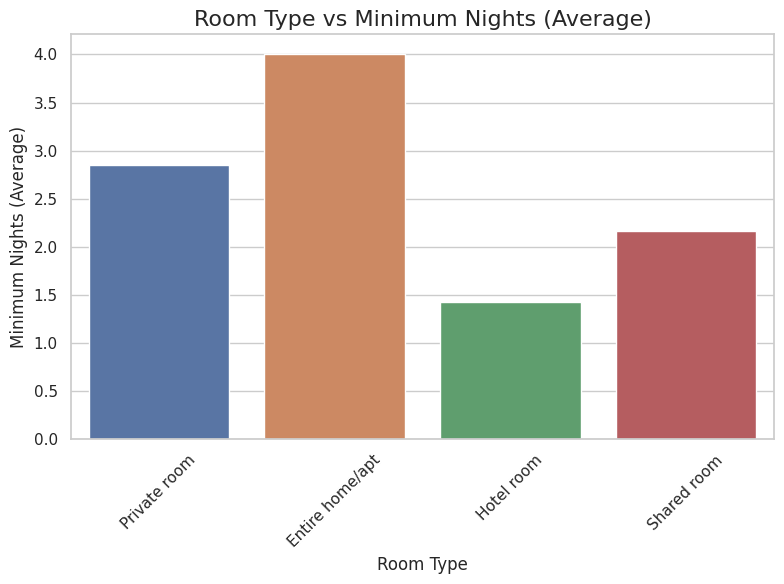

In [28]:
sns.set(style="whitegrid")


plt.figure(figsize=(8, 6))
sns.barplot(x='room_type', y='minimum_nights', data=df, estimator='mean', errorbar=None)
plt.title('Room Type vs Minimum Nights (Average)', fontsize=16)
plt.xlabel('Room Type', fontsize=12)
plt.ylabel('Minimum Nights (Average)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [29]:
room_type_mn = df.groupby('room_type')['minimum_nights'].mean().reset_index()
room_type_mn.columns = ['Room Type', 'Minimum Nights (Average)']

room_type_mn

,Room Type,Minimum Nights (Average)
0,Entire home/apt,4.008147
1,Hotel room,1.429167
2,Private room,2.855575
3,Shared room,2.168421


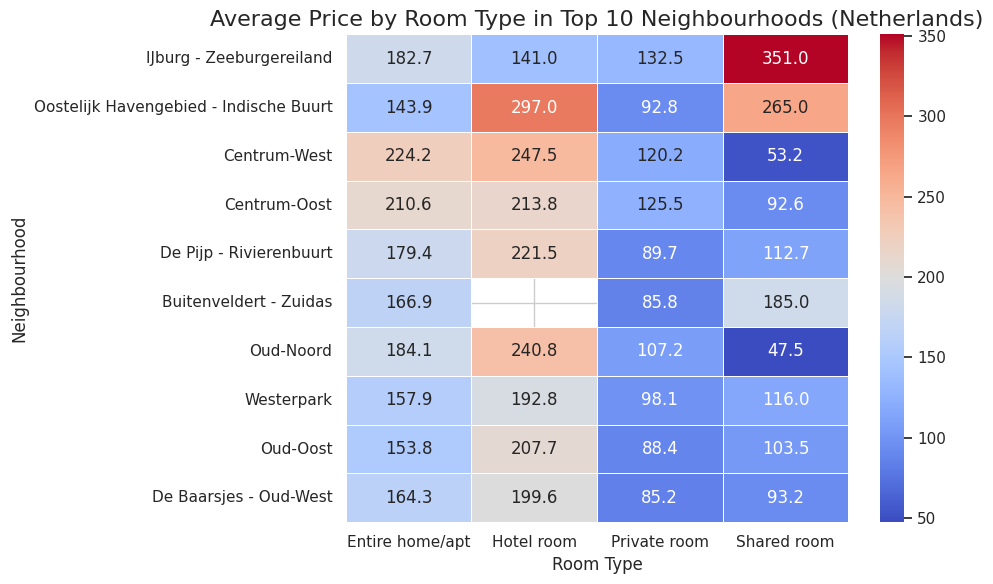

In [30]:
netherlands_df = df[df['country_name'] == 'Netherlands']

pivot_df = netherlands_df.pivot_table(index='neighbourhood', columns='room_type', values='price', aggfunc='mean')

top_neighbourhoods_price = pivot_df.mean(axis=1).nlargest(10)

pivot_top = pivot_df.loc[top_neighbourhoods_price.index]

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_top, annot=True, fmt='.1f', cmap='coolwarm', linewidths=.5)

plt.title('Average Price by Room Type in Top 10 Neighbourhoods (Netherlands)', fontsize=16)
plt.xlabel('Room Type', fontsize=12)
plt.ylabel('Neighbourhood', fontsize=12)

plt.tight_layout()

plt.show()

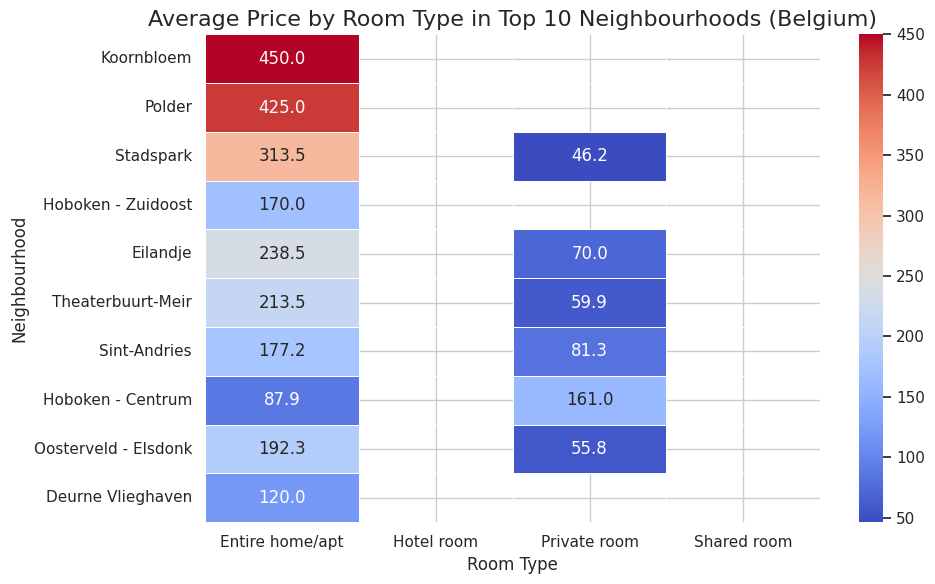

In [31]:
netherlands_df = df[df['country_name'] == 'Belgium']

pivot_df = netherlands_df.pivot_table(index='neighbourhood', columns='room_type', values='price', aggfunc='mean')

top_neighbourhoods_price = pivot_df.mean(axis=1).nlargest(10)

pivot_top = pivot_df.loc[top_neighbourhoods_price.index]

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_top, annot=True, fmt='.1f', cmap='coolwarm', linewidths=.5)

plt.title('Average Price by Room Type in Top 10 Neighbourhoods (Belgium)', fontsize=16)
plt.xlabel('Room Type', fontsize=12)
plt.ylabel('Neighbourhood', fontsize=12)

plt.tight_layout()

plt.show()

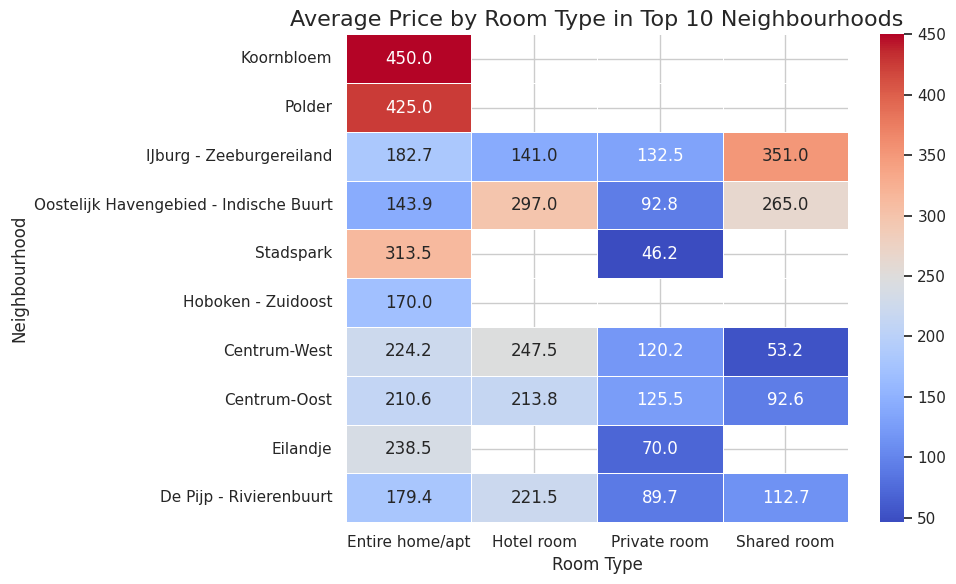

In [32]:
pivot_df = df.pivot_table(index='neighbourhood', columns='room_type', values='price', aggfunc='mean')

top_neighbourhoods_price = pivot_df.mean(axis=1).nlargest(10)
pivot_top = pivot_df.loc[top_neighbourhoods_price.index]

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_top, annot=True, fmt='.1f', cmap='coolwarm', linewidths=.5)


plt.title('Average Price by Room Type in Top 10 Neighbourhoods', fontsize=16)
plt.xlabel('Room Type', fontsize=12)
plt.ylabel('Neighbourhood', fontsize=12)
plt.tight_layout()

plt.show()


/tmp/ipykernel_17/3859248801.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_data['neighbourhood_short'] = top_10_data['neighbourhood'].apply(lambda x: x[:15])


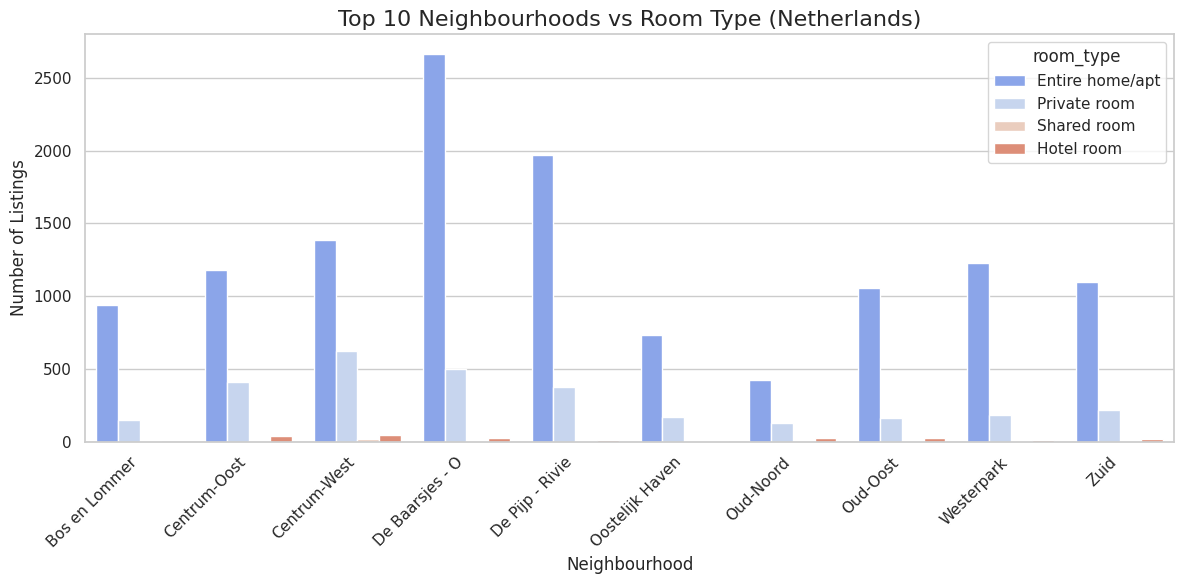

In [33]:
netherlands_df = df[df['country_name'] == 'Netherlands']

neighbourhood_roomtype_count = netherlands_df.groupby(['neighbourhood', 'room_type']).size().reset_index(name='count')

top_10_neighbourhoods = neighbourhood_roomtype_count.groupby('neighbourhood')['count'].sum().nlargest(10).index

top_10_data = neighbourhood_roomtype_count[neighbourhood_roomtype_count['neighbourhood'].isin(top_10_neighbourhoods)]

top_10_data['neighbourhood_short'] = top_10_data['neighbourhood'].apply(lambda x: x[:15])

plt.figure(figsize=(12, 6))
sns.barplot(x='neighbourhood_short', y='count', hue='room_type', data=top_10_data, palette='coolwarm')

plt.title('Top 10 Neighbourhoods vs Room Type (Netherlands)', fontsize=16)
plt.xlabel('Neighbourhood', fontsize=12)
plt.ylabel('Number of Listings', fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()

plt.show()


/tmp/ipykernel_17/4236402607.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_data['neighbourhood_short'] = top_10_data['neighbourhood'].apply(lambda x: x[:15])


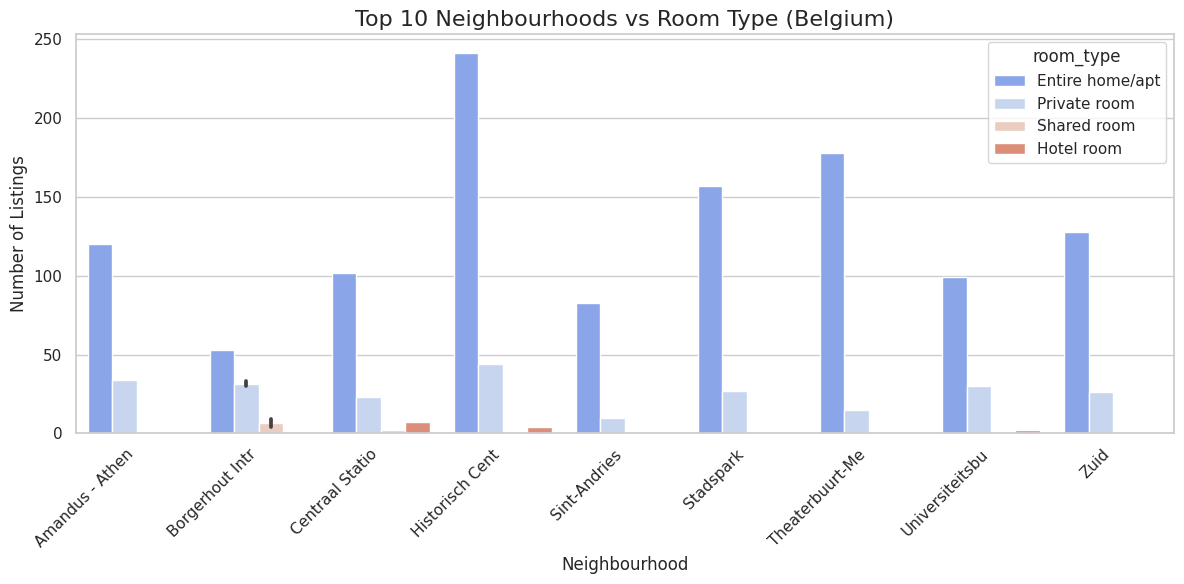

In [34]:
belgium_df = df[df['country_name'] == 'Belgium']

neighbourhood_roomtype_count = belgium_df.groupby(['neighbourhood', 'room_type']).size().reset_index(name='count')

top_10_neighbourhoods = neighbourhood_roomtype_count.groupby('neighbourhood')['count'].sum().nlargest(10).index

top_10_data = neighbourhood_roomtype_count[neighbourhood_roomtype_count['neighbourhood'].isin(top_10_neighbourhoods)]

top_10_data['neighbourhood_short'] = top_10_data['neighbourhood'].apply(lambda x: x[:15])

plt.figure(figsize=(12, 6))
sns.barplot(x='neighbourhood_short', y='count', hue='room_type', data=top_10_data, palette='coolwarm')

plt.title('Top 10 Neighbourhoods vs Room Type (Belgium)', fontsize=16)
plt.xlabel('Neighbourhood', fontsize=12)
plt.ylabel('Number of Listings', fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()

plt.show()


In [35]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()


In [36]:
import pandas as pd

# Filter the dataframe for both Netherlands and Belgium
netherlands_df = df[df['country_name'] == 'Netherlands']
belgium_df = df[df['country_name'] == 'Belgium']

# Function to get top 10 neighborhoods for a given DataFrame
def get_top_10_neighbourhoods(country_df, country_name):
    neighbourhood_roomtype_count = country_df.groupby(['neighbourhood', 'room_type']).size().reset_index(name='count')
    top_10_neighbourhoods = neighbourhood_roomtype_count.groupby('neighbourhood')['count'].sum().nlargest(10).index
    top_10_data = neighbourhood_roomtype_count[neighbourhood_roomtype_count['neighbourhood'].isin(top_10_neighbourhoods)]
    
    # Use .loc to avoid SettingWithCopyWarning
    top_10_data.loc[:, 'neighbourhood_short'] = top_10_data['neighbourhood'].apply(lambda x: x[:15])
    top_10_data.loc[:, 'country'] = country_name  # Add country name

    return top_10_data

# Get top 10 neighborhoods for both countries
top_10_netherlands = get_top_10_neighbourhoods(netherlands_df, 'Netherlands')
top_10_belgium = get_top_10_neighbourhoods(belgium_df, 'Belgium')

# Combine the results
combined_top_10 = pd.concat([top_10_netherlands, top_10_belgium], ignore_index=True)

# Create a pivot table for the combined data, including the country in the index
table = combined_top_10.pivot_table(index=['country', 'neighbourhood_short'], columns='room_type', values='count', aggfunc='sum', fill_value=0)
table = table.reset_index()  # Reset index to make 'country' and 'neighbourhood_short' columns

# Print the resulting table
print("Table of Room Type vs Number of Listings for Top 10 Neighbourhoods (Netherlands and Belgium):")
table

Table of Room Type vs Number of Listings for Top 10 Neighbourhoods (Netherlands and Belgium):


/tmp/ipykernel_17/4140974922.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_data.loc[:, 'neighbourhood_short'] = top_10_data['neighbourhood'].apply(lambda x: x[:15])
/tmp/ipykernel_17/4140974922.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_data.loc[:, 'country'] = country_name  # Add country name
/tmp/ipykernel_17/4140974922.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

room_type,country,neighbourhood_short,Entire home/apt,Hotel room,Private room,Shared room
0,Belgium,Amandus - Athen,120,0,34,0
1,Belgium,Borgerhout Intr,106,0,63,13
2,Belgium,Centraal Statio,102,7,23,2
3,Belgium,Historisch Cent,241,4,44,1
4,Belgium,Sint-Andries,83,0,10,0
5,Belgium,Stadspark,157,0,27,0
6,Belgium,Theaterbuurt-Me,178,0,15,0
7,Belgium,Universiteitsbu,99,2,30,1
8,Belgium,Zuid,128,0,26,1
9,Netherlands,Bos en Lommer,936,0,150,1


/tmp/ipykernel_17/988932642.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_data['neighbourhood_short'] = top_10_data['neighbourhood'].apply(lambda x: x[:15])


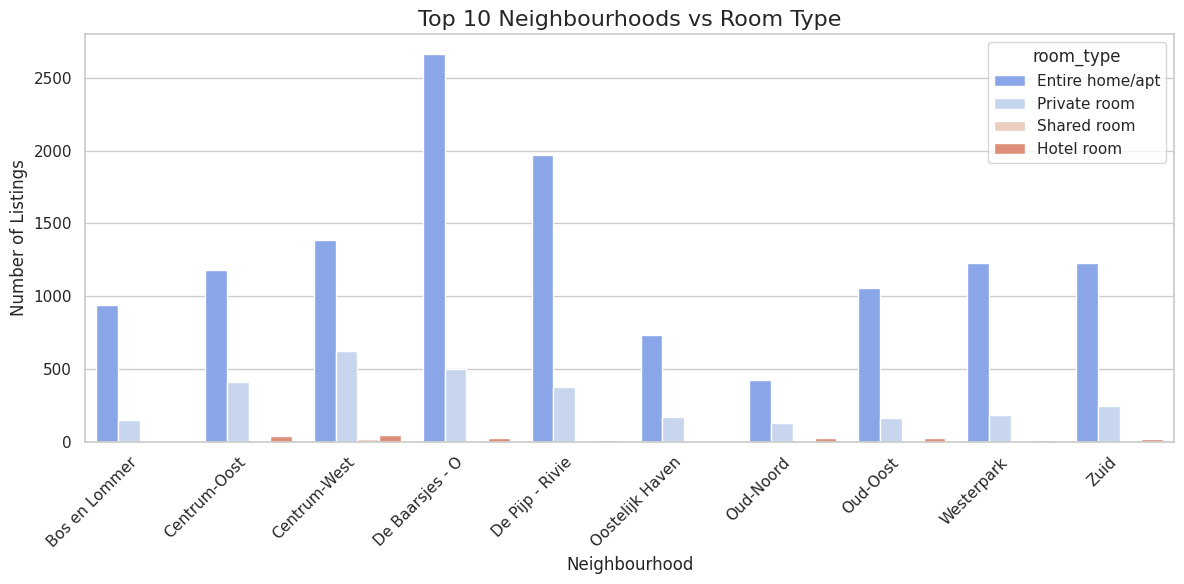

In [37]:
neighbourhood_roomtype_count = df.groupby(['neighbourhood', 'room_type']).size().reset_index(name='count')

top_10_neighbourhoods = neighbourhood_roomtype_count.groupby('neighbourhood')['count'].sum().nlargest(10).index

top_10_data = neighbourhood_roomtype_count[neighbourhood_roomtype_count['neighbourhood'].isin(top_10_neighbourhoods)]

top_10_data['neighbourhood_short'] = top_10_data['neighbourhood'].apply(lambda x: x[:15])

plt.figure(figsize=(12, 6))
sns.barplot(x='neighbourhood_short', y='count', hue='room_type', data=top_10_data, palette='coolwarm')

plt.title('Top 10 Neighbourhoods vs Room Type', fontsize=16)
plt.xlabel('Neighbourhood', fontsize=12)
plt.ylabel('Number of Listings', fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [38]:
neighbourhood_roomtype_count = df.groupby(['neighbourhood', 'room_type']).size().reset_index(name='count')

top_10_neighbourhoods = neighbourhood_roomtype_count.groupby('neighbourhood')['count'].sum().nlargest(10).index
top_10_data = neighbourhood_roomtype_count[neighbourhood_roomtype_count['neighbourhood'].isin(top_10_neighbourhoods)]

top_10_data['neighbourhood_short'] = top_10_data['neighbourhood'].apply(lambda x: x[:15])

table = top_10_data.pivot_table(index='neighbourhood_short', columns='room_type', values='count', aggfunc='sum', fill_value=0)
table = table.reset_index()  # Reset index to make 'neighbourhood_short' a column

print("Table of Room Type vs Number of Listings for Top 10 Neighbourhoods:")
table

Table of Room Type vs Number of Listings for Top 10 Neighbourhoods:


/tmp/ipykernel_17/2822692208.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_data['neighbourhood_short'] = top_10_data['neighbourhood'].apply(lambda x: x[:15])


room_type,neighbourhood_short,Entire home/apt,Hotel room,Private room,Shared room
0,Bos en Lommer,936,0,150,1
1,Centrum-Oost,1181,39,407,5
2,Centrum-West,1386,46,625,14
3,De Baarsjes - O,2666,22,497,6
4,De Pijp - Rivie,1970,13,378,6
5,Oostelijk Haven,732,4,172,3
6,Oud-Noord,424,24,128,2
7,Oud-Oost,1052,24,162,2
8,Westerpark,1227,11,181,3
9,Zuid,1228,20,243,5


Neighbourhood

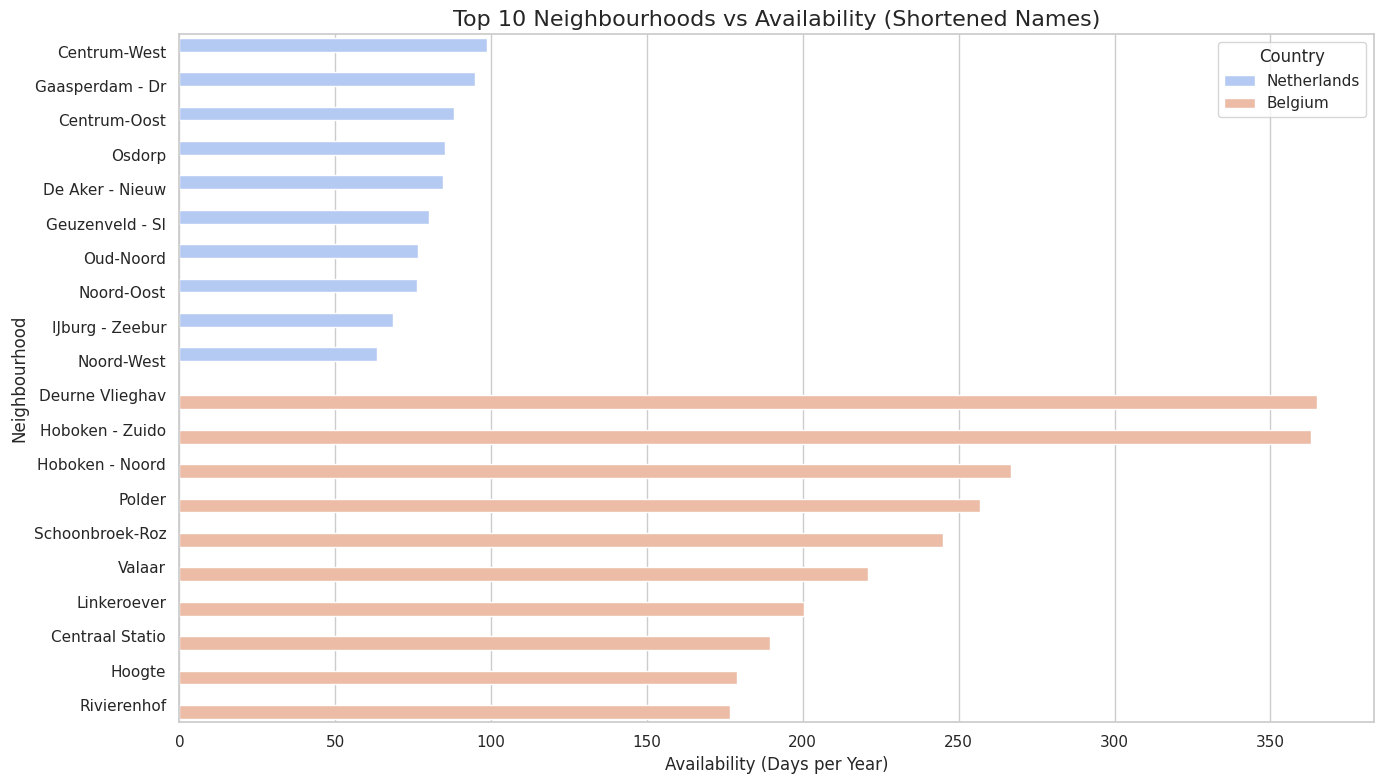

In [39]:
neighbourhood_availability = df.groupby(['country_name', 'neighbourhood'])['availability_365'].mean().reset_index()

# Function to get top 10 neighborhoods for a given country
def get_top_10_neighbourhoods(country_df):
    return country_df.sort_values(by='availability_365', ascending=False).head(10)

# Get top 10 neighborhoods for each country
top_10_netherlands = get_top_10_neighbourhoods(neighbourhood_availability[neighbourhood_availability['country_name'] == 'Netherlands'])
top_10_belgium = get_top_10_neighbourhoods(neighbourhood_availability[neighbourhood_availability['country_name'] == 'Belgium'])

# Combine the results
combined_top_10 = pd.concat([top_10_netherlands, top_10_belgium], ignore_index=True)

# Create a shortened version of the neighborhood names for better display
combined_top_10['neighbourhood_short'] = combined_top_10['neighbourhood'].apply(lambda x: x[:15])

# Plotting
plt.figure(figsize=(14, 8))
sns.barplot(x='availability_365', y='neighbourhood_short', data=combined_top_10, hue='country_name', palette='coolwarm')

plt.title('Top 10 Neighbourhoods vs Availability (Shortened Names)', fontsize=16)
plt.xlabel('Availability (Days per Year)', fontsize=12)
plt.ylabel('Neighbourhood', fontsize=12)
plt.legend(title='Country')

plt.tight_layout()
plt.show()


In [40]:
top_10_table = combined_top_10[['country_name', 'neighbourhood_short', 'availability_365']].rename(columns={
    'neighbourhood_short': 'Neighbourhood',
    'availability_365': 'Availability'
})

print("Table of Top 10 Neighbourhoods vs Availability (Country Wise):")
top_10_table

Table of Top 10 Neighbourhoods vs Availability (Country Wise):


,country_name,Neighbourhood,Availability
0,Netherlands,Centrum-West,98.592950
1,Netherlands,Gaasperdam - Dr,94.976190
2,Netherlands,Centrum-Oost,88.107843
3,Netherlands,Osdorp,85.354331
4,Netherlands,De Aker - Nieuw,84.683824
5,Netherlands,Geuzenveld - Sl,79.932127
6,Netherlands,Oud-Noord,76.707612
7,Netherlands,Noord-Oost,76.303030
8,Netherlands,IJburg - Zeebur,68.631347
9,Netherlands,Noord-West,63.340206


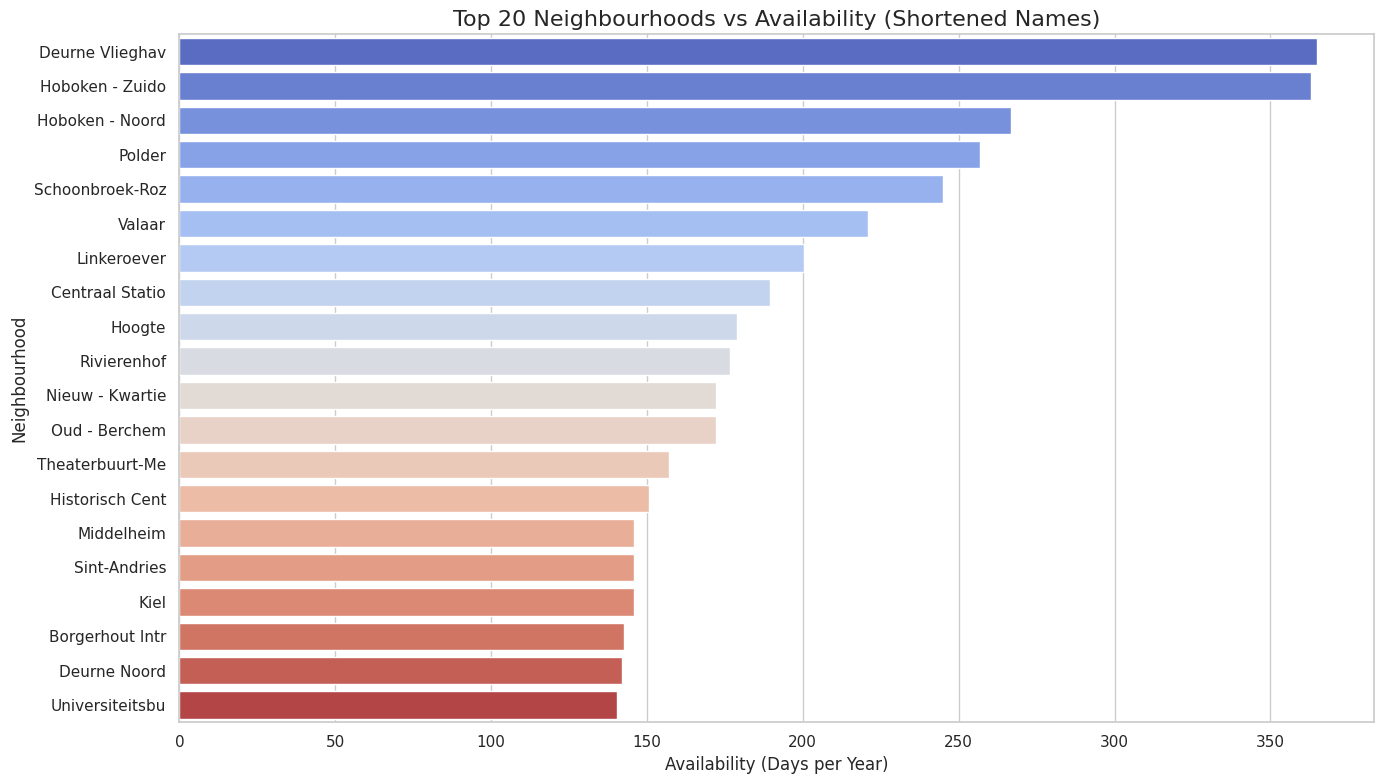

In [41]:
neighbourhood_availability = df.groupby('neighbourhood')['availability_365'].mean().reset_index()
top_20_neighbourhoods = neighbourhood_availability.sort_values(by='availability_365', ascending=False).head(20)
top_20_neighbourhoods['neighbourhood_short'] = top_20_neighbourhoods['neighbourhood'].apply(lambda x: x[:15])

plt.figure(figsize=(14, 8))
sns.barplot(x='availability_365', y='neighbourhood_short', data=top_20_neighbourhoods, palette='coolwarm')

plt.title('Top 20 Neighbourhoods vs Availability (Shortened Names)', fontsize=16)
plt.xlabel('Availability (Days per Year)', fontsize=12)
plt.ylabel('Neighbourhood', fontsize=12)

plt.tight_layout()
plt.show()


In [42]:
neighbourhood_availability = df.groupby('neighbourhood')['availability_365'].mean().reset_index()
top_20_neighbourhoods = neighbourhood_availability.sort_values(by='availability_365', ascending=False).head(20)
top_20_neighbourhoods['neighbourhood_short'] = top_20_neighbourhoods['neighbourhood'].apply(lambda x: x[:15])
top_20_table = top_20_neighbourhoods[['neighbourhood_short', 'availability_365']].rename(columns={'neighbourhood_short': 'Neighbourhood', 'availability_365': 'Availability'})

top_20_table

,Neighbourhood,Availability
19,Deurne Vlieghav,365.000000
34,Hoboken - Zuido,363.000000
32,Hoboken - Noord,266.666667
61,Polder,257.000000
63,Schoonbroek-Roz,245.000000
72,Valaar,221.000000
41,Linkeroever,200.352941
9,Centraal Statio,189.544776
35,Hoogte,178.736842
62,Rivierenhof,176.500000


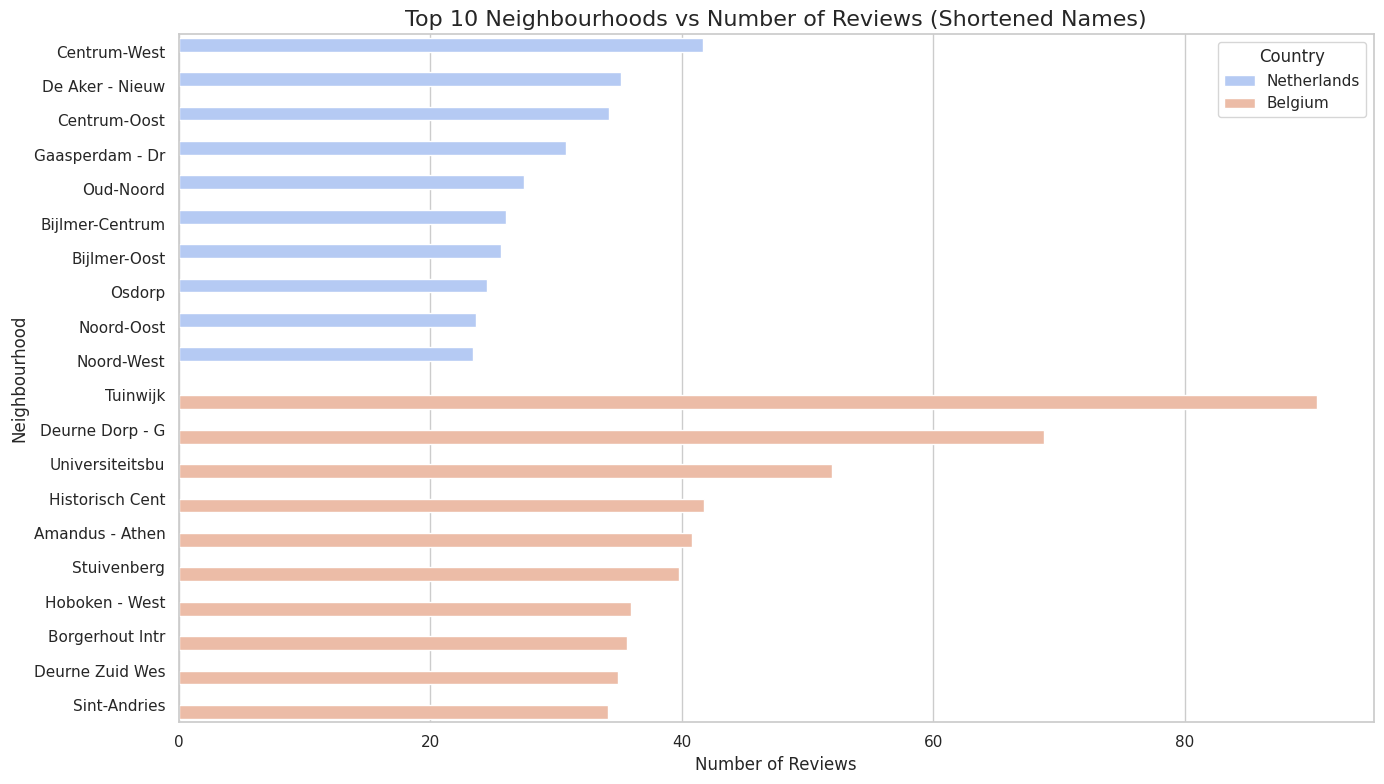

In [43]:
neighbourhood_availability = df.groupby(['country_name', 'neighbourhood'])['number_of_reviews'].mean().reset_index()

def get_top_10_neighbourhoods(country_df):
    return country_df.sort_values(by='number_of_reviews', ascending=False).head(10)

top_10_netherlands = get_top_10_neighbourhoods(neighbourhood_availability[neighbourhood_availability['country_name'] == 'Netherlands'])
top_10_belgium = get_top_10_neighbourhoods(neighbourhood_availability[neighbourhood_availability['country_name'] == 'Belgium'])

combined_top_10 = pd.concat([top_10_netherlands, top_10_belgium], ignore_index=True)

combined_top_10['neighbourhood_short'] = combined_top_10['neighbourhood'].apply(lambda x: x[:15])


plt.figure(figsize=(14, 8))
sns.barplot(x='number_of_reviews', y='neighbourhood_short', data=combined_top_10, hue='country_name', palette='coolwarm')

plt.title('Top 10 Neighbourhoods vs Number of Reviews (Shortened Names)', fontsize=16)
plt.xlabel('Number of Reviews', fontsize=12)
plt.ylabel('Neighbourhood', fontsize=12)
plt.legend(title='Country')

plt.tight_layout()
plt.show()


In [44]:
top_10_table = combined_top_10[['country_name', 'neighbourhood_short', 'number_of_reviews']].rename(columns={
    'neighbourhood_short': 'Neighbourhood',
    'number_of_reviews': 'Number of Reviews'
})

print("Table of Top 10 Neighbourhoods vs Number of Reviews (Country Wise):")
top_10_table

Table of Top 10 Neighbourhoods vs Number of Reviews (Country Wise):


,country_name,Neighbourhood,Number of Reviews
0,Netherlands,Centrum-West,41.690005
1,Netherlands,De Aker - Nieuw,35.169118
2,Netherlands,Centrum-Oost,34.244485
3,Netherlands,Gaasperdam - Dr,30.777778
4,Netherlands,Oud-Noord,27.460208
5,Netherlands,Bijlmer-Centrum,26.062500
6,Netherlands,Bijlmer-Oost,25.656863
7,Netherlands,Osdorp,24.496063
8,Netherlands,Noord-Oost,23.681818
9,Netherlands,Noord-West,23.435567


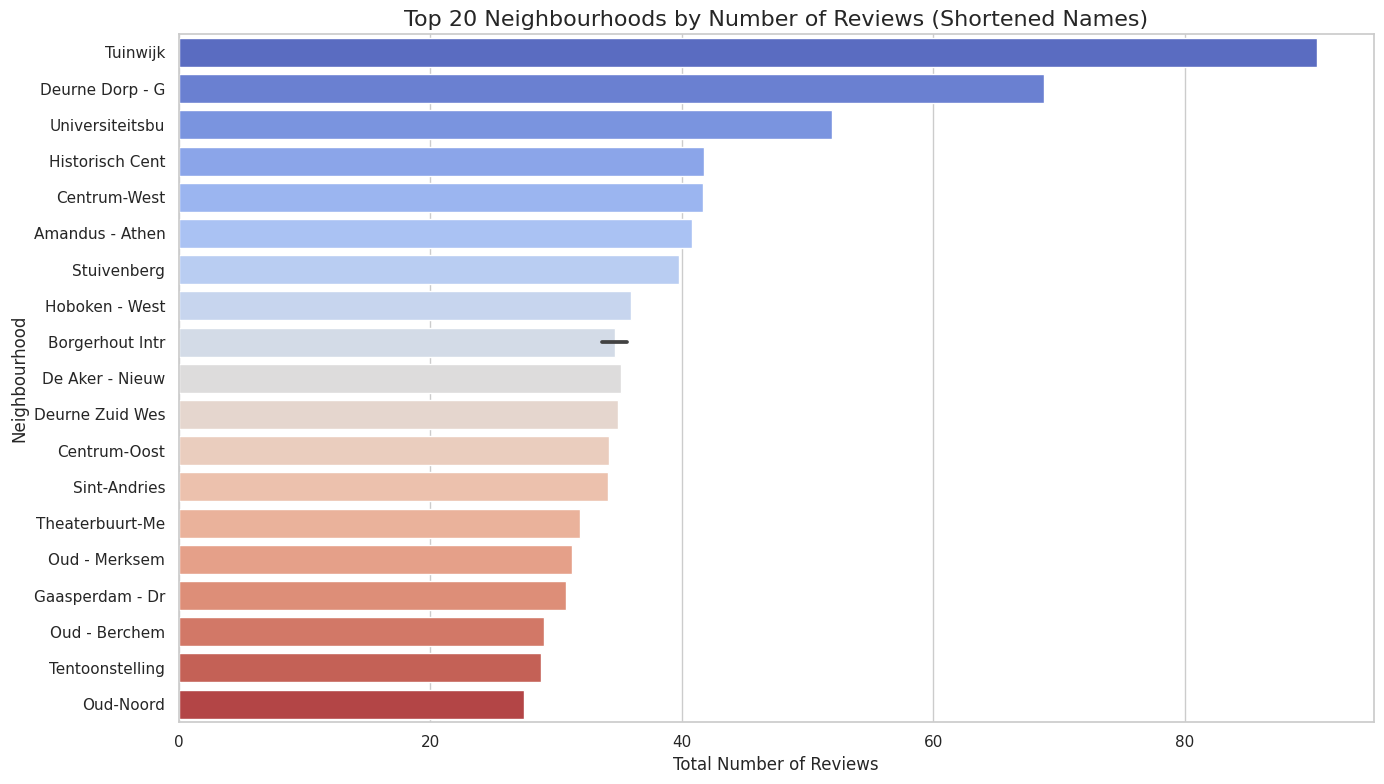

In [45]:
neighbourhood_reviews = df.groupby('neighbourhood')['number_of_reviews'].mean().reset_index()

top_20_neighbourhoods = neighbourhood_reviews.sort_values(by='number_of_reviews', ascending=False).head(20)

top_20_neighbourhoods['neighbourhood_short'] = top_20_neighbourhoods['neighbourhood'].apply(lambda x: x[:15])
plt.figure(figsize=(14, 8))
sns.barplot(x='number_of_reviews', y='neighbourhood_short', data=top_20_neighbourhoods, palette='coolwarm')

plt.title('Top 20 Neighbourhoods by Number of Reviews (Shortened Names)', fontsize=16)
plt.xlabel('Total Number of Reviews', fontsize=12)
plt.ylabel('Neighbourhood', fontsize=12)

plt.tight_layout()
plt.show()

In [46]:
neighbourhood_availability = df.groupby('neighbourhood')['number_of_reviews'].mean().reset_index()
top_20_neighbourhoods = neighbourhood_availability.sort_values(by='number_of_reviews', ascending=False).head(20)

top_20_neighbourhoods['neighbourhood_short'] = top_20_neighbourhoods['neighbourhood'].apply(lambda x: x[:15])

top_20_table = top_20_neighbourhoods[['neighbourhood_short', 'number_of_reviews']].rename(columns={'neighbourhood_short': 'Neighbourhood', 'number_of_reviews': 'Number of Reviews (Mean)'})

top_20_table


,Neighbourhood,Number of Reviews (Mean)
70,Tuinwijk,90.500000
16,Deurne Dorp - G,68.800000
71,Universiteitsbu,51.954545
30,Historisch Cent,41.779310
11,Centrum-West,41.690005
0,Amandus - Athen,40.805195
67,Stuivenberg,39.777778
33,Hoboken - West,36.000000
4,Borgerhout Intr,35.655556
13,De Aker - Nieuw,35.169118


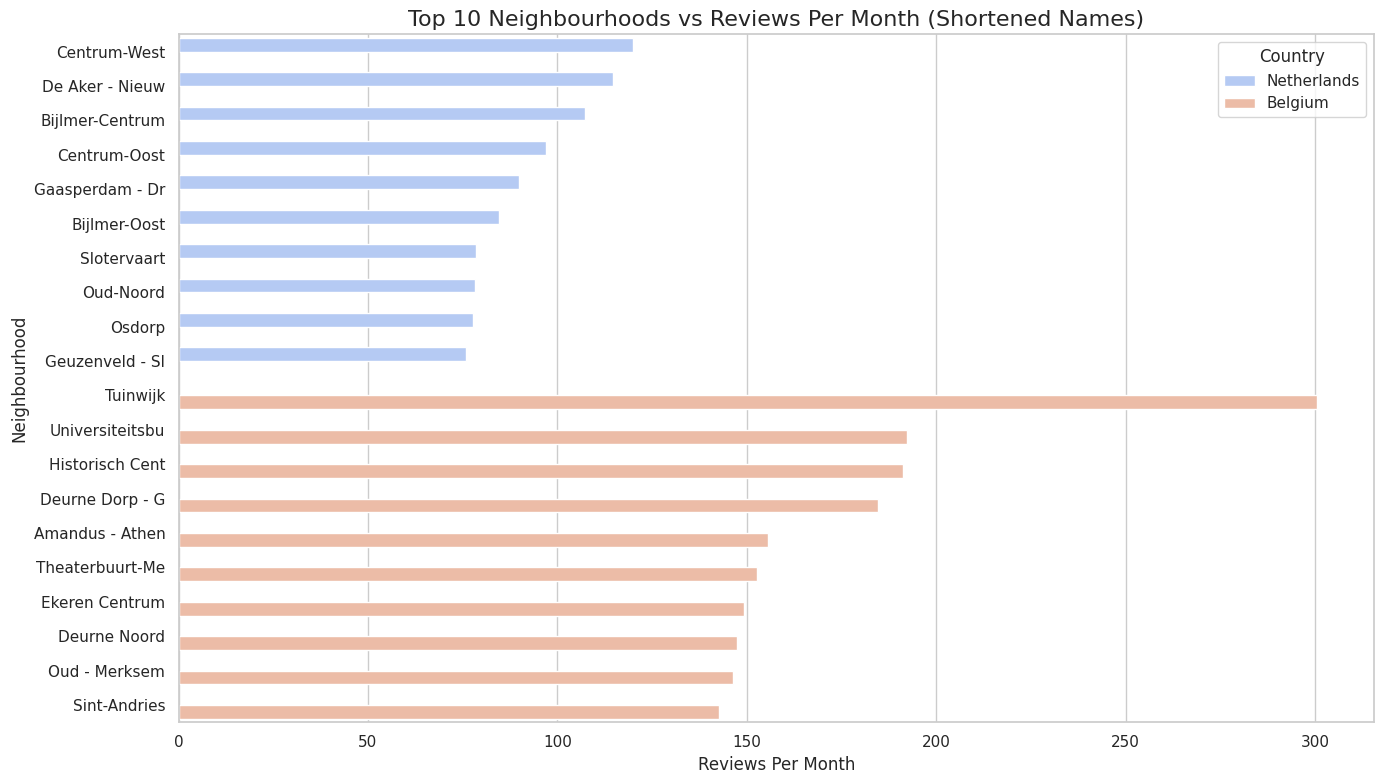

In [47]:
neighbourhood_availability = df.groupby(['country_name', 'neighbourhood'])['reviews_per_month'].mean().reset_index()

def get_top_10_neighbourhoods(country_df):
    return country_df.sort_values(by='reviews_per_month', ascending=False).head(10)

top_10_netherlands = get_top_10_neighbourhoods(neighbourhood_availability[neighbourhood_availability['country_name'] == 'Netherlands'])
top_10_belgium = get_top_10_neighbourhoods(neighbourhood_availability[neighbourhood_availability['country_name'] == 'Belgium'])

combined_top_10 = pd.concat([top_10_netherlands, top_10_belgium], ignore_index=True)

combined_top_10['neighbourhood_short'] = combined_top_10['neighbourhood'].apply(lambda x: x[:15])


plt.figure(figsize=(14, 8))
sns.barplot(x='reviews_per_month', y='neighbourhood_short', data=combined_top_10, hue='country_name', palette='coolwarm')

plt.title('Top 10 Neighbourhoods vs Reviews Per Month (Shortened Names)', fontsize=16)
plt.xlabel('Reviews Per Month', fontsize=12)
plt.ylabel('Neighbourhood', fontsize=12)
plt.legend(title='Country')

plt.tight_layout()
plt.show()


In [48]:
top_10_table = combined_top_10[['country_name', 'neighbourhood_short', 'reviews_per_month']].rename(columns={
    'neighbourhood_short': 'Neighbourhood',
    'reviews_per_month': 'Reviews Per Month'
})

print("Table of Top 10 Neighbourhoods vs Reviews Per Month (Country Wise):")
top_10_table

Table of Top 10 Neighbourhoods vs Reviews Per Month (Country Wise):


,country_name,Neighbourhood,Reviews Per Month
0,Netherlands,Centrum-West,119.977298
1,Netherlands,De Aker - Nieuw,114.621622
2,Netherlands,Bijlmer-Centrum,107.326087
3,Netherlands,Centrum-Oost,96.929850
4,Netherlands,Gaasperdam - Dr,89.974359
5,Netherlands,Bijlmer-Oost,84.577778
6,Netherlands,Slotervaart,78.488235
7,Netherlands,Oud-Noord,78.290698
8,Netherlands,Osdorp,77.605769
9,Netherlands,Geuzenveld - Sl,75.867403


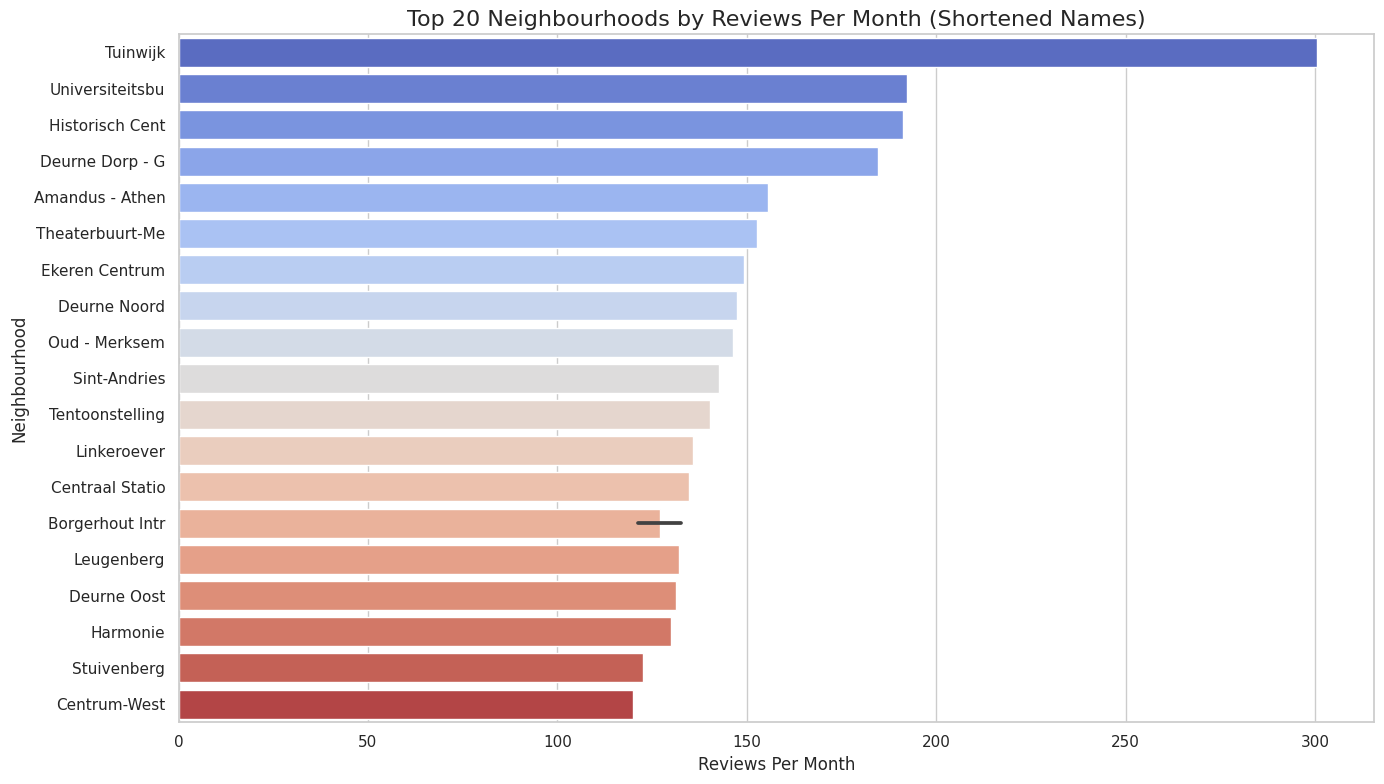

In [49]:
neighbourhood_reviews = df.groupby('neighbourhood')['reviews_per_month'].mean().reset_index()

top_20_neighbourhoods = neighbourhood_reviews.sort_values(by='reviews_per_month', ascending=False).head(20)
top_20_neighbourhoods['neighbourhood_short'] = top_20_neighbourhoods['neighbourhood'].apply(lambda x: x[:15])

plt.figure(figsize=(14, 8))
sns.barplot(x='reviews_per_month', y='neighbourhood_short', data=top_20_neighbourhoods, palette='coolwarm')

plt.title('Top 20 Neighbourhoods by Reviews Per Month (Shortened Names)', fontsize=16)
plt.xlabel('Reviews Per Month', fontsize=12)
plt.ylabel('Neighbourhood', fontsize=12)

plt.tight_layout()
plt.show()


In [50]:
neighbourhood_availability = df.groupby('neighbourhood')['reviews_per_month'].mean().reset_index()

top_20_neighbourhoods = neighbourhood_availability.sort_values(by='reviews_per_month', ascending=False).head(20)

top_20_neighbourhoods['neighbourhood_short'] = top_20_neighbourhoods['neighbourhood'].apply(lambda x: x[:15])

top_20_table = top_20_neighbourhoods[['neighbourhood_short', 'reviews_per_month']].rename(columns={'neighbourhood_short': 'Neighbourhood', 'reviews_per_month': 'Reviews Per Month (Mean)'})

top_20_table


,Neighbourhood,Reviews Per Month (Mean)
70,Tuinwijk,300.500000
71,Universiteitsbu,192.385965
30,Historisch Cent,191.182927
16,Deurne Dorp - G,184.500000
0,Amandus - Athen,155.603175
69,Theaterbuurt-Me,152.726708
24,Ekeren Centrum,149.200000
17,Deurne Noord,147.454545
57,Oud - Merksem,146.461538
64,Sint-Andries,142.773333


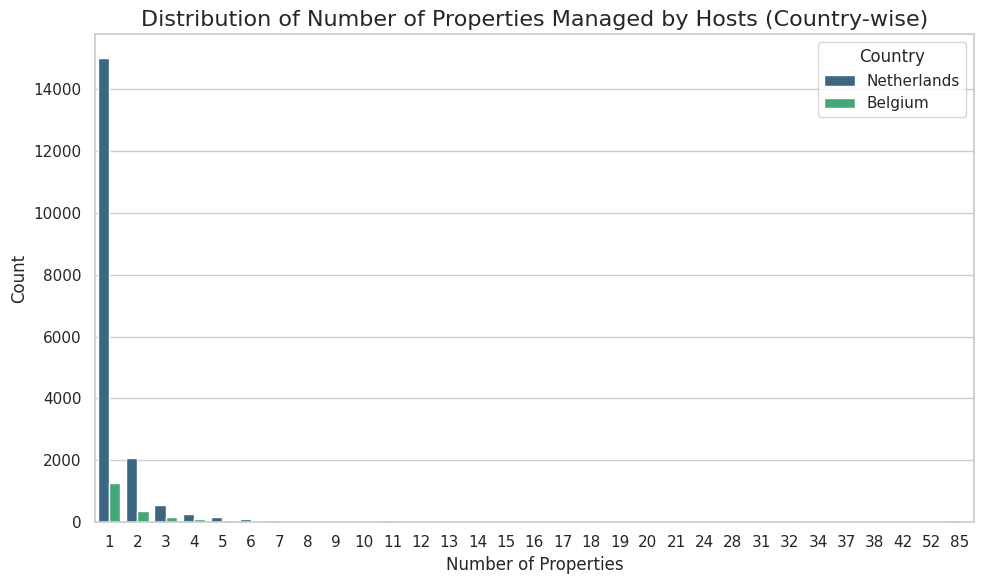

In [51]:
plt.figure(figsize=(10, 6))
sns.countplot(x='calculated_host_listings_count', data=df, hue='country_name', palette='viridis')

plt.title('Distribution of Number of Properties Managed by Hosts (Country-wise)', fontsize=16)
plt.xlabel('Number of Properties', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Country')
plt.tight_layout()
plt.show()


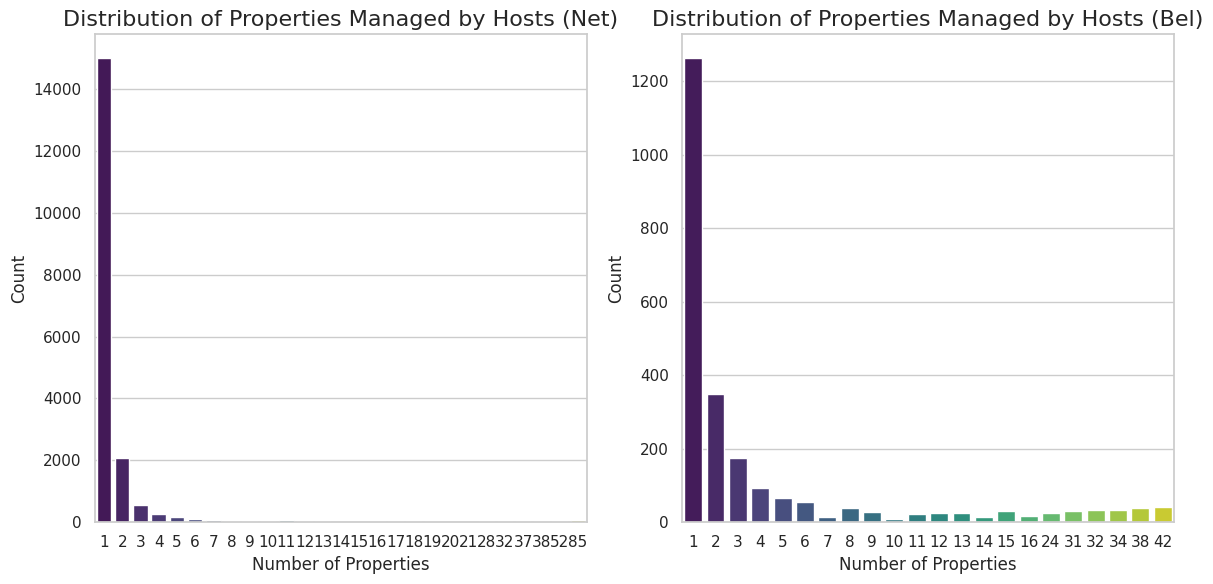

In [52]:
# Set up the figure
plt.figure(figsize=(12, 6))

# Filter data for the Netherlands
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
sns.countplot(x='calculated_host_listings_count', data=df[df['country_name'] == 'Netherlands'], palette='viridis')
plt.title('Distribution of Properties Managed by Hosts (Net)', fontsize=16)
plt.xlabel('Number of Properties', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Filter data for Belgium
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
sns.countplot(x='calculated_host_listings_count', data=df[df['country_name'] == 'Belgium'], palette='viridis')
plt.title('Distribution of Properties Managed by Hosts (Bel)', fontsize=16)
plt.xlabel('Number of Properties', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()


In [53]:
# Calculate the count of properties managed by hosts, grouped by country
properties_distribution = df.groupby(['country_name', 'calculated_host_listings_count']).size().reset_index(name='Count')

# Sort the table for better readability
properties_distribution = properties_distribution.sort_values(by=['country_name', 'calculated_host_listings_count'])

# Rename columns for clarity
properties_distribution.columns = ['Country', 'Number of Properties', 'Count']

# Print the resulting table
print("Table of Distribution of Number of Properties Managed by Hosts (Country-wise):")
properties_distribution

Table of Distribution of Number of Properties Managed by Hosts (Country-wise):


,Country,Number of Properties,Count
0,Belgium,1,1265
1,Belgium,2,348
2,Belgium,3,174
3,Belgium,4,92
4,Belgium,5,65
5,Belgium,6,54
6,Belgium,7,14
7,Belgium,8,40
8,Belgium,9,27
9,Belgium,10,10


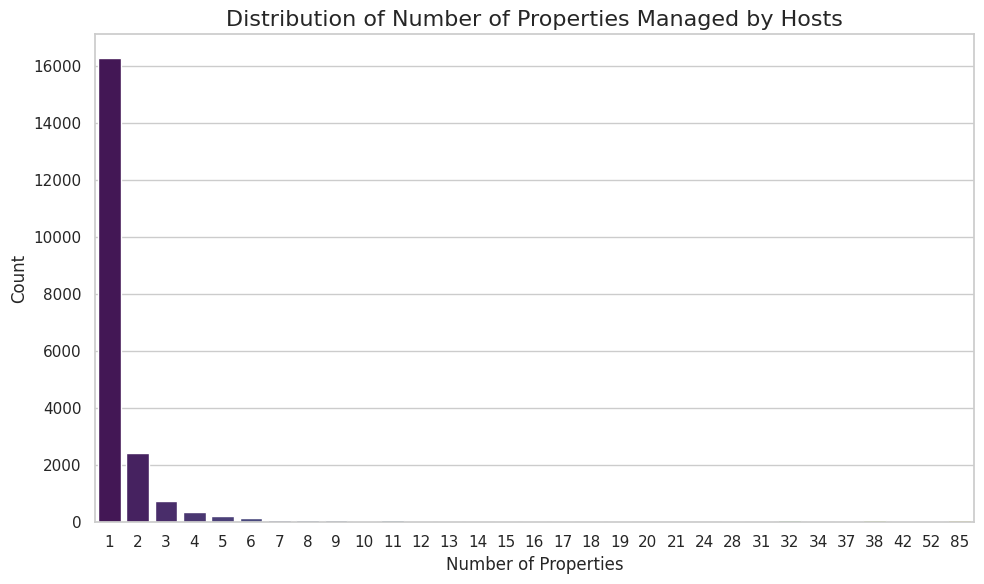

In [54]:
plt.figure(figsize=(10, 6))
sns.countplot(x='calculated_host_listings_count', data=df, palette='viridis')
plt.title('Distribution of Number of Properties Managed by Hosts', fontsize=16)
plt.xlabel('Number of Properties', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()


In [55]:
properties_distribution = df['calculated_host_listings_count'].value_counts().reset_index()
properties_distribution.columns = ['Number of Properties', 'Count']

properties_distribution = properties_distribution.sort_values(by='Number of Properties')

properties_distribution


,Number of Properties,Count
0,1,16284
1,2,2432
2,3,738
3,4,348
4,5,230
5,6,144
8,7,77
10,8,72
12,9,63
19,10,40
